# Environment equirements to get started
- Python>=3.7.0
- PyTorch>=1.7

https://pytorch.org/

In [18]:
# ! pip3 install torch torchvision torchaudio

# Download Github Repo

In [19]:
# ! git clone https://github.com/ultralytics/yolov5  # clone

# Install and import dependencies

In [20]:
# ! pip install -r yolov5/requirements.txt  # install

In [ ]:
import torch  # Used to load YOLO model and make detections
#import matplotlib
#matplotlib.use('TkAgg')
from matplotlib import pyplot as plt  # Used to plot images
import numpy as np  # Used array transformation
import cv2 #  Used to handle images
from PIL import Image, ImageDraw, ImageFont # Used to draw images

# Load Model

- Load the pre trained Ultralytics model from torchhub
- https://pytorch.org/hub/ultralytics_yolov5/
- There are different sized models, we will use the lightweight 'small' model.


In [ ]:
# We will use the small YOLOv5 model trained on COCO dataset
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
#model = torch.hub.load('ultralytics/yolov5', 'yolov5l')


In [25]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# Inference
- YOLO github link: https://github.com/ultralytics/yolov5 
- COCO classes: https://gist.github.com/AruniRC/7b3dadd004da04c80198557db5da4bda

### Using Sample Ultralytics Image

In [4]:
# Images
img = 'https://ultralytics.com/images/zidane.jpg' 

In [5]:
# Inference
output = model(img)

In [6]:
# Results
output.print()  #  Prints the results, but doesn't render

image 1/1: 720x1280 2 persons, 2 ties
Speed: 695.5ms pre-process, 56.0ms inference, 1.6ms NMS per image at shape (1, 3, 384, 640)


In [7]:
output.xyxy
# [xmin, ymin, xmax, ymax, confidence, class]

[tensor([[7.43290e+02, 4.83436e+01, 1.14176e+03, 7.20000e+02, 8.79861e-01, 0.00000e+00],
         [4.41990e+02, 4.37337e+02, 4.96585e+02, 7.10036e+02, 6.75118e-01, 2.70000e+01],
         [1.23051e+02, 1.93238e+02, 7.14691e+02, 7.19771e+02, 6.66693e-01, 0.00000e+00],
         [9.78990e+02, 3.13579e+02, 1.02530e+03, 4.15526e+02, 2.61517e-01, 2.70000e+01]])]

In [15]:
# Display image with bounding boxes using .show()
output.show()
#plt.imshow(np.squeeze(output.render())) # np.squeeze removes the extra dimension
#plt.show()

### Use another sample image

In [16]:
torch.hub.download_url_to_file("https://resources.stuff.co.nz/content/dam/images/4/z/0/7/n/f/image.related.StuffLandscapeSixteenByNine.1240x700.4z06gg.png/1660410703152.jpg", "all_blacks_photo.jpg")
img = Image.open("all_blacks_photo.jpg")

100%|██████████| 86.6k/86.6k [00:00<00:00, 349kB/s]


In [19]:
output = model(img)
output.show()
#plt.imshow(np.squeeze(output.render())) # np.squeeze removes the extra dimension
#plt.show()

In [15]:
torch.hub.download_url_to_file("https://assets3.thrillist.com/v1/image/2624055/792x456/scale;webp=auto;jpeg_quality=60;progressive.jpg", "kiwi_bird.jpg")
img = Image.open("kiwi_bird.jpg")
output = model(img)
output.show()
#plt.imshow(np.squeeze(output.render())) # np.squeeze removes the extra dimension
#plt.show()

100%|██████████| 44.5k/44.5k [00:00<00:00, 11.2MB/s]
/var/folders/m3/t1wm9gh97dbgrtxr4w1jnh0c0000gn/T/ipykernel_82169/3529167085.py:6: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [20]:
torch.hub.download_url_to_file("https://draxe.com/wp-content/uploads/2016/02/KiwiThumbnail.jpg", "kiwi_fruit.jpg")

img = Image.open("kiwi_fruit.jpg")
output = model(img)
output.show()
plt.imshow(np.squeeze(output.render())) # np.squeeze removes the extra dimension
plt.show()

100%|██████████| 90.3k/90.3k [00:00<00:00, 121kB/s] 
/var/folders/m3/t1wm9gh97dbgrtxr4w1jnh0c0000gn/T/ipykernel_89747/30348462.py:8: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


### Using detect.py

In [30]:
torch.hub.download_url_to_file("https://t4.ftcdn.net/jpg/01/88/19/15/360_F_188191506_RDcuWrKYTuoRZOPMmgtUzouF0Im97LWP.jpg", "kitchen_photo.jpg")

100%|██████████| 42.0k/42.0k [00:00<00:00, 3.61MB/s]


In [ ]:
! cd yolov5 && python detect.py --weights yolov5s.pt --img 640 --source "../kitchen_photo.jpg"

In [21]:
img = Image.open("yolov5/runs/detect/exp6/kitchen_photo.jpg")
img.show()
#plt.imshow(img) # np.squeeze removes the extra dimension
#plt.show()

/var/folders/m3/t1wm9gh97dbgrtxr4w1jnh0c0000gn/T/ipykernel_89747/687270093.py:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


### Using a video

In [17]:
# Detect objects in a video 
! cd yolov5 && python detect.py --weights ../yolov5l.pt --source "https://youtu.be/r125_IWLAEE"

detect: weights=['../yolov5l.pt'], source=https://youtu.be/r125_IWLAEE, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.2-10-g5c854fa Python-3.9.5 torch-1.12.1 CPU

Fusing layers... 
YOLOv5l summary: 367 layers, 46533693 parameters, 0 gradients
requirements: pafy not found and is required by YOLOv5, attempting auto-update...

requirements: youtube_dl==2020.12.2 not found and is required by YOLOv5, attempting auto-update...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 22.7 MB/s eta 0:00:00

requirements: 2 packages updated per ['pafy', 'youtube_dl==2020.12.2']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


# Wrap into functions

In [25]:
# Detect and count objects in an image
def detect_and_count(img, model, threshold):
    preds = model(img).xyxy[0]
    counts, boxes = {}, {}
    for *box, conf, c in preds:
        if conf < threshold:
            continue
        class_name = model.names[c.int().item()]
        if class_name not in counts:
            counts[class_name] = 0
            boxes[class_name] = []
        counts[class_name] += 1
        boxes[class_name].append([coord.item() for coord in box])
    
    return counts, boxes

In [26]:
# Draw bounding boxes on an image
def draw_boxes(img, boxes):
    img = img.copy()
    draw = ImageDraw.Draw(img, "RGB")
    font = ImageFont.load_default()
    for obj in boxes:
        for box in boxes[obj]:
            draw.rectangle(box, width=3, outline="#" + "%06x" % 0xde75f6)
            draw.text(
                (box[0] + 10, box[1] + 5),
                obj,
                fill=0
                #fill="#%06x" % 0xde75f6
            )
            
    return img

{'chair': 3, 'oven': 1, 'bowl': 6, 'sink': 1, 'potted plant': 1, 'cup': 2, 'bottle': 1, 'knife': 1, 'dining table': 1}


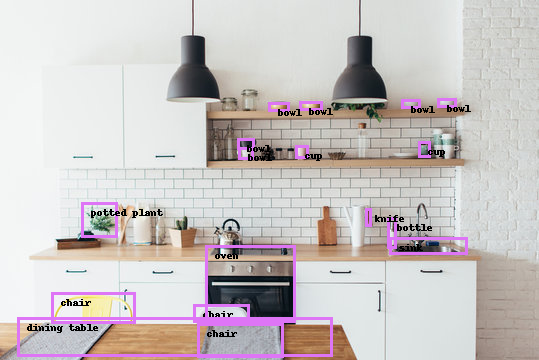

In [27]:
img = Image.open("kitchen_photo.jpg")
counts, boxes = detect_and_count(img, model, threshold=0.1)
print(counts)
draw_boxes(img, boxes)

# Real time video capture

https://www.youtube.com/watch?v=tFNJGim3FXw

In [28]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()  # unpack variables from capture
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))  # Render the results
    
    if cv2.waitKey(10) & 0xFF == ord('q'):  # If you press q, quit.
        break
cap.release()
cv2.destroyAllWindows()

: 